**Import libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

**Load MNIST dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('shape of the training set:', np.shape(x_train), np.shape(y_train))
print('shape of the testing set: ', np.shape(x_test), np.shape(y_test))
x_train, x_test = x_train / 255.0, x_test / 255.0

shape of the training set: (60000, 28, 28) (60000,)
shape of the testing set:  (10000, 28, 28) (10000,)


**Visualize an image**

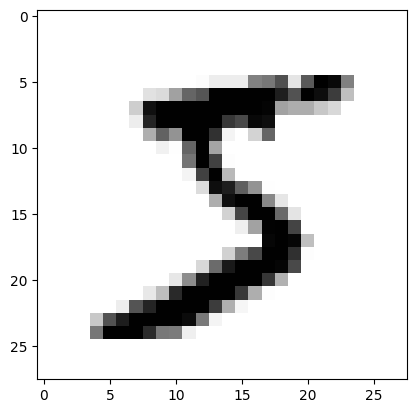

image's label: 5


In [3]:
plt.imshow(x_train[0], cmap='binary')
plt.show()
print("image's label:", y_train[0])

**Build a FCNN model**

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Plot the architecture diagram**

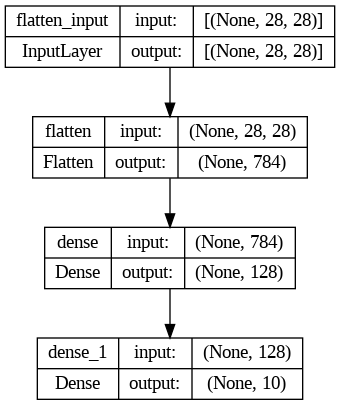

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

**Compile the model**

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train and evaluate the model**

In [7]:
history = model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2565 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1124 - accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0774 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0352 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0197 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0

[0.08449643850326538, 0.9779000282287598]

**Plot Accuracy**

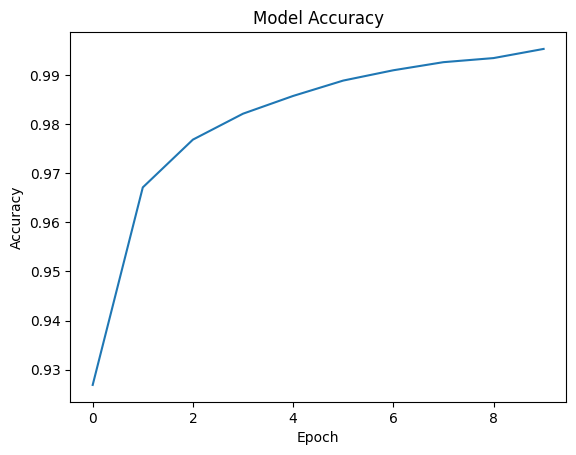

In [8]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

**Plot Loss**

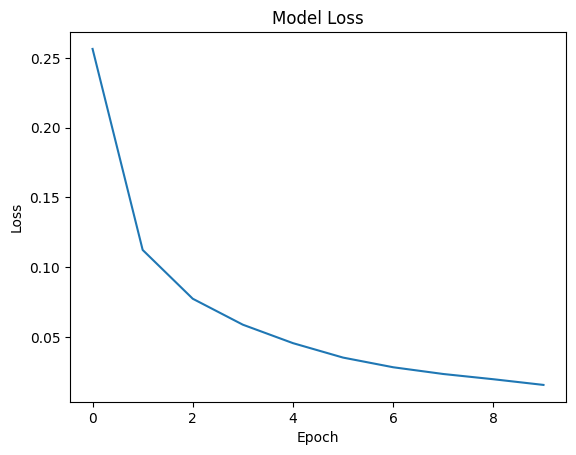

In [9]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()